#**<center>$\color{B}{\text{SOAL UJI KE 2 : KLASTERISASI}}$</center>**

---

Kudus terkenal dengan filosofinya GUSJIGANG, masyarakat kudus diharapkan bagus perilakunya pandai orang-orangnya dan umumnya gemar berdagang. Pada umumnya masyarakat Kudus banyak yang menjadi pengusaha dari usaha kecil, menengah dan industri besar. Pemerataan akses internet dan perkembangan teknologi saat ini turut membantu meningkatkan usaha-usaha yang ada di Kudus salah satunya usaha Batik Kudus.

Pak Ahmad selaku pemilik usaha Batik Kudus beberapa bulan ini telah memanfaatkan akses internet dan menjual kain batik dengan memanfaatkan perkembangan teknologi yang ada saat ini. Pak Ahmad menerapkan pendataan terhadap para pelanggannya dan diharapkan data tersebut dapat dimanfaatkan untuk strategi pemasaran, inovasi produk dan menentukan harga produk yang sesuai. Untuk melakukan hal tersebut Pak Ahmad membutuhkan seorang Data Scientist.

Anggaplah Anda seorang Data Scientist. Pak Ahmad telah mempercayai Anda untuk melakukan pemetaan terhadap pelanggannya. Hasil pemetaan pelanggan digunakan untuk membuat klaster Grade atau tingkatan dalam memproduksi kain batik, selain itu juga dapat untuk menentukan harga produk yang sesuai.

##Task 1

Anda telah diberikan data pelanggan (dataset), silahkan Anda load dataset dan perhatikan Atribut apa saja yang ada pada data tersebut.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv('/content/Data_Pelanggan.csv')
dataset.head()

,PelangganID,Jenis_Kelamin,Usia,Pendapatan_per_tahun (juta Rp),Rating_pengeluaran (1-100)
0,1,Pria,19.0,15.0,39.0
1,2,Pria,21.0,15.0,81.0
2,3,Wanita,20.0,16.0,6.0
3,4,Wanita,23.0,16.0,77.0
4,5,Wanita,31.0,17.0,40.0


##Task 2
Setelah Anda perhatikan Atributnya, masih terdapat null value dan duplikat data. Silahkan anda lakukan handling missing value dengan rataan dari data dan handling data duplicate.

In [ ]:
# 1) menentukan fitur yang akan digunakan atau menghapus yang tidak terpakai

dataset.drop(["PelangganID"], axis = 1, inplace=True)

In [ ]:
# 2) Handling missing value dengan rataan dari data
dataset.isna().sum()


Jenis_Kelamin                     0
Usia                              2
Pendapatan_per_tahun (juta Rp)    1
Rating_pengeluaran (1-100)        1
dtype: int64

In [ ]:
import math
dataset['Usia'].fillna(math.floor(dataset['Usia'].mean()), inplace=True)
dataset['Pendapatan_per_tahun (juta Rp)'].fillna(math.floor(dataset['Pendapatan_per_tahun (juta Rp)'].mean()), inplace=True)
dataset['Rating_pengeluaran (1-100)'].fillna(math.floor(dataset['Rating_pengeluaran (1-100)'].mean()), inplace=True)

In [ ]:
dataset.isna().sum()

Jenis_Kelamin                     0
Usia                              0
Pendapatan_per_tahun (juta Rp)    0
Rating_pengeluaran (1-100)        0
dtype: int64

In [ ]:
# 3) Handling data duplicate 
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200     True
201     True
Length: 202, dtype: bool

In [ ]:
# 4) menampilkan data hasil preprocessing
df =dataset.drop_duplicates(keep='first')
df

,Jenis_Kelamin,Usia,Pendapatan_per_tahun (juta Rp),Rating_pengeluaran (1-100)
0,Pria,19.0,15.0,39.0
1,Pria,21.0,15.0,81.0
2,Wanita,20.0,16.0,6.0
3,Wanita,23.0,16.0,77.0
4,Wanita,31.0,17.0,40.0
...,...,...,...,...
195,Wanita,35.0,120.0,79.0
196,Wanita,45.0,126.0,28.0
197,Pria,32.0,126.0,74.0
198,Pria,32.0,137.0,18.0


##Task 3
Anda telah melakukan preprocessing data dan data telah siap untuk dianalisis. Silahkan Anda bisa menampilkan:  

1. rentang distribusi pendapatan per tahun dan rating pengeluaran.
2. distribusi populasi pria dan wanita dalam dataset.
3. distribusi jumlah pelanggan pada setiap kelompok umur ("18-25","26-35","36-45","46-55","55+")
4. jumlah pelanggan sesuai dengan rating pengeluaran mereka ("1-20", "21-40", "41-60", "61-80", "81-100")
5. jumlah pelanggan menurut pendapatan per tahun (juta) ("Rp. 0 - 30", "Rp. 31 - 60", "Rp. 61 - 90", "Rp. 91 - 120", "Rp. 121 - 150")

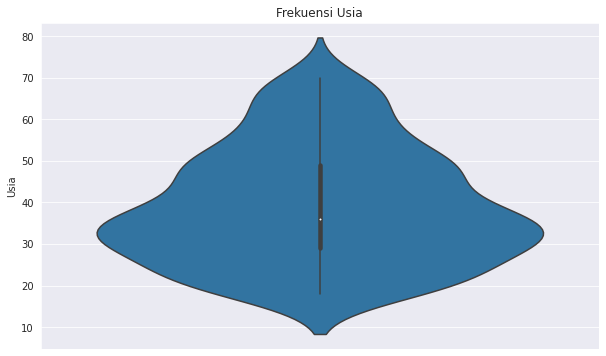

In [ ]:
# 1) Menampilkan frekuensi usia pelanggan (menggunakan violinplot)
#df.drop(["PelangganID"], axis = 1, inplace=True)
plt.figure(figsize=(10,6))
plt.title("Frekuensi Usia")
sns.axes_style("dark")
sns.violinplot(y=df["Usia"])
plt.show()

#jelaskan hasilnya

**Penjelasan Hasil**

pada umumnya usia pelanggan 30-40 

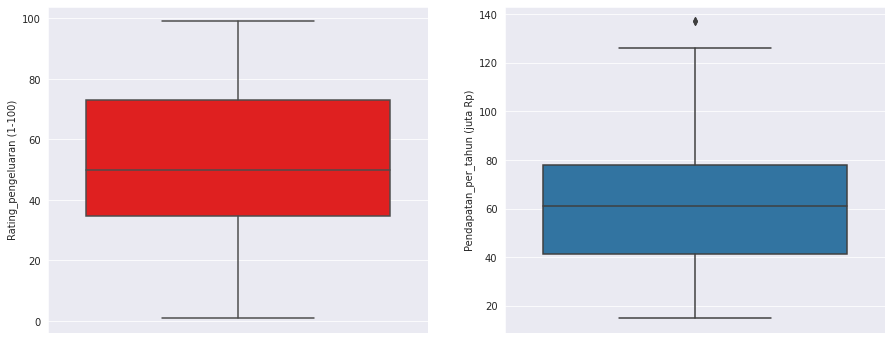

In [ ]:
# 1) Menampilkan rentang distribusi pendapatan per tahun dan rating pengeluaran (menggunakan boxplot)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Rating_pengeluaran (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Pendapatan_per_tahun (juta Rp)"])
plt.show()
#jelaskan hasilnya

**Penjelasan Hasil**

Rating pengeluaran lebih tinggi dibandingkan pendapatan pertahun.

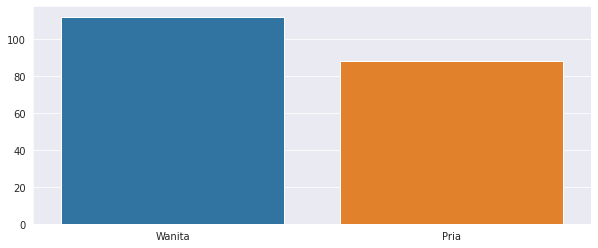

In [ ]:
# 2) Menampilkan distribusi populasi pria dan wanita dalam dataset (menggunakan barplot)
genders = df.Jenis_Kelamin.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()
#jelaskan hasilnya

**Penjelasan Hasil**

Pelanggan didominasi jenis kelamin wanita.

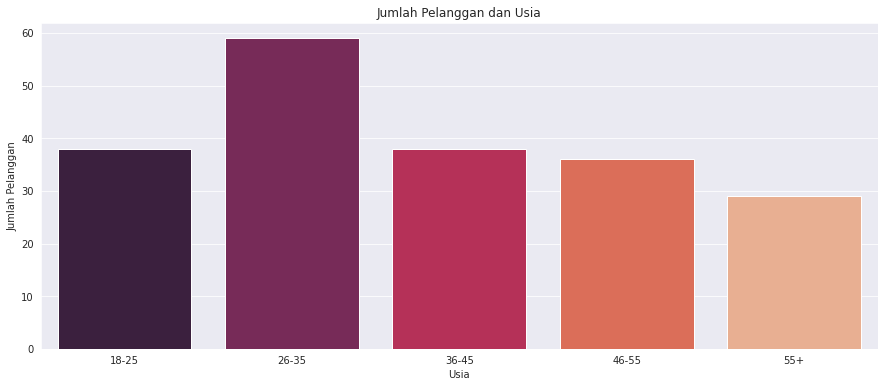

In [ ]:
# 3) Menampilkan jumlah pelanggan pada setiap kelompok umur ("18-25","26-35","36-45","46-55","55+") (menggunakan barplot)
age18_25 = df.Usia[(df.Usia <= 25) & (df.Usia >= 18)]
age26_35 = df.Usia[(df.Usia <= 35) & (df.Usia >= 26)]
age36_45 = df.Usia[(df.Usia <= 45) & (df.Usia >= 36)]
age46_55 = df.Usia[(df.Usia <= 55) & (df.Usia >= 46)]
age55above = df.Usia[df.Usia >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Jumlah Pelanggan dan Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")
plt.show()
#jelaskan hasilnya

**Penjelasan Hasil**

Jumlah pelanggan tertinggi ada pada usia 26-35.

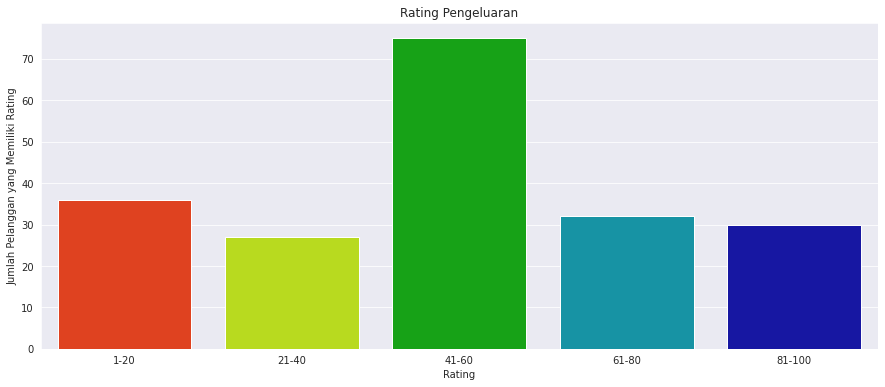

In [ ]:
# 4) Menampilkan jumlah pelanggan sesuai dengan rating pengeluaran mereka ("1-20", "21-40", "41-60", "61-80", "81-100") (menggunakan barplot)
ss1_20 = df["Rating_pengeluaran (1-100)"][(df["Rating_pengeluaran (1-100)"] >= 1) & (df["Rating_pengeluaran (1-100)"] <= 20)]
ss21_40 = df["Rating_pengeluaran (1-100)"][(df["Rating_pengeluaran (1-100)"] >= 21) & (df["Rating_pengeluaran (1-100)"] <= 40)]
ss41_60 = df["Rating_pengeluaran (1-100)"][(df["Rating_pengeluaran (1-100)"] >= 41) & (df["Rating_pengeluaran (1-100)"] <= 60)]
ss61_80 = df["Rating_pengeluaran (1-100)"][(df["Rating_pengeluaran (1-100)"] >= 61) & (df["Rating_pengeluaran (1-100)"] <= 80)]
ss81_100 = df["Rating_pengeluaran (1-100)"][(df["Rating_pengeluaran (1-100)"] >= 81) & (df["Rating_pengeluaran (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Rating Pengeluaran")
plt.xlabel("Rating")
plt.ylabel("Jumlah Pelanggan yang Memiliki Rating")
plt.show()
#jelaskan hasilnya

**Penjelasan Hasil**

Mayoritas pelanggan memiliki rating 41-60.

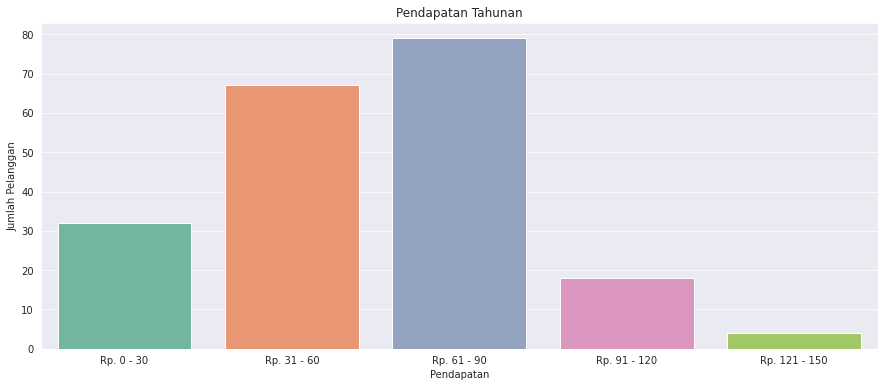

In [ ]:
# 5) Menampilkan jumlah pelanggan menurut pendapatan per tahun (juta) ("Rp. 0 - 30", "Rp. 31 - 60", "Rp. 61 - 90", "Rp. 91 - 120", "Rp. 121 - 150") (menggunakan barplot)
ai0_30 = df["Pendapatan_per_tahun (juta Rp)"][(df["Pendapatan_per_tahun (juta Rp)"] >= 0) & (df["Pendapatan_per_tahun (juta Rp)"] <= 30)]
ai31_60 = df["Pendapatan_per_tahun (juta Rp)"][(df["Pendapatan_per_tahun (juta Rp)"] >= 31) & (df["Pendapatan_per_tahun (juta Rp)"] <= 60)]
ai61_90 = df["Pendapatan_per_tahun (juta Rp)"][(df["Pendapatan_per_tahun (juta Rp)"] >= 61) & (df["Pendapatan_per_tahun (juta Rp)"] <= 90)]
ai91_120 = df["Pendapatan_per_tahun (juta Rp)"][(df["Pendapatan_per_tahun (juta Rp)"] >= 91) & (df["Pendapatan_per_tahun (juta Rp)"] <= 120)]
ai121_150 = df["Pendapatan_per_tahun (juta Rp)"][(df["Pendapatan_per_tahun (juta Rp)"] >= 121) & (df["Pendapatan_per_tahun (juta Rp)"] <= 150)]

aix = ["Rp. 0 - 30", "Rp. 31 - 60", "Rp. 61 - 90", "Rp. 91 - 120", "Rp. 121 - 150"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Pendapatan Tahunan")
plt.xlabel("Pendapatan")
plt.ylabel("Jumlah Pelanggan")
plt.show()
#jelaskan hasilnya

**Penjelasan Hasil**

Mayoritas pelanggan memiliki pendapatan dikisaran Rp. 61-90 juta.

##Task 4
Selanjutnya, Anda diminta untuk klasterisasi data menggunakan metode K-Means. Silahkan Anda tentukan jumlah klaster (K) menggunkan metode Elbow dan tampilkan plot.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

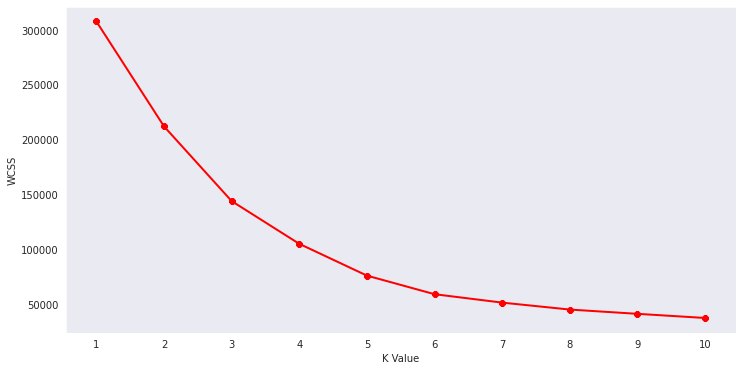

In [ ]:
# 1) Menentukan jumlah klaster (K) menggunakan metode Elbow

# 2) Menampilkan plot

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

##Task 5
Pada tahap ini, Anda diminta untuk menjalankan metode K-Means ke dalam dataset dan memvisualisasikan hasil klaster.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-34-381354dc7d28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = clusters


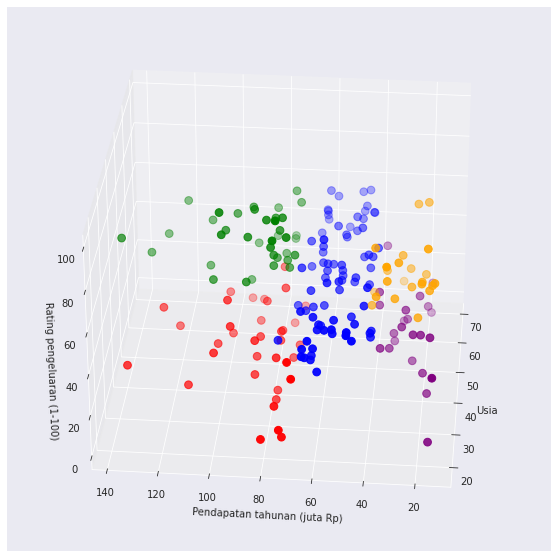

In [ ]:
# 1) Gunakan fitur "Usia", "Pendapatan_per_tahun (juta Rp)", "Rating_pengeluaran (1-100)" untuk melakukan klasterisasi menggunakan metode K-Means dengan K sesuai hasil Task 4 
# 2) Menampilkan visualisasi hasil klaster dalam bentuk 3D
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Usia[df.label == 0], df["Pendapatan_per_tahun (juta Rp)"][df.label == 0], df["Rating_pengeluaran (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Usia[df.label == 1], df["Pendapatan_per_tahun (juta Rp)"][df.label == 1], df["Rating_pengeluaran (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Usia[df.label == 2], df["Pendapatan_per_tahun (juta Rp)"][df.label == 2], df["Rating_pengeluaran (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Usia[df.label == 3], df["Pendapatan_per_tahun (juta Rp)"][df.label == 3], df["Rating_pengeluaran (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Usia[df.label == 4], df["Pendapatan_per_tahun (juta Rp)"][df.label == 4], df["Rating_pengeluaran (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Usia")
plt.ylabel("Pendapatan tahunan (juta Rp)")
ax.set_zlabel('Rating pengeluaran (1-100)')
plt.show()
